In [115]:
!pip install scikit-learn

In [116]:
 !pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=18e141cb3795685d67fee9e19719e174d160582b5f5c1f411d0c22aa530b48ca
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
hd= pd.read_csv('C:/Users/DELL/Downloads/kc_house_data.csv')
hd.info()
display(hd)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


**id** :a notation for a house
,**date**: Date house was sold
,**price**: Price is prediction target
,**bedrooms**: Number of Bedrooms/House
,**bathrooms**: Number of bathrooms/bedrooms
,**sqft_living**: square footage of the home
,**sqft_lot**: square footage of the lot
,**floors** :Total floors (levels) in house
,**waterfront** :House which has a view to a waterfront
,**view**: Has been viewed
,**condition** :How good the condition is Overall
,**grade**: overall grade given to the housing unit, based on King County grading system(1-13)
,**sqft_above** :square footage of house apart from basement
,**sqft_basement**: square footage of the basement
,**yr_built** :Built Year
,**yr_renovated** :Year when house was renovated
,**zipcode**:zip code
,**lat**: Latitude coordinate
,**long**: Longitude coordinate
,**sqft_living15** :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
,**sqft_lot15** :lotSize area in 2015(implies-- some renovations)

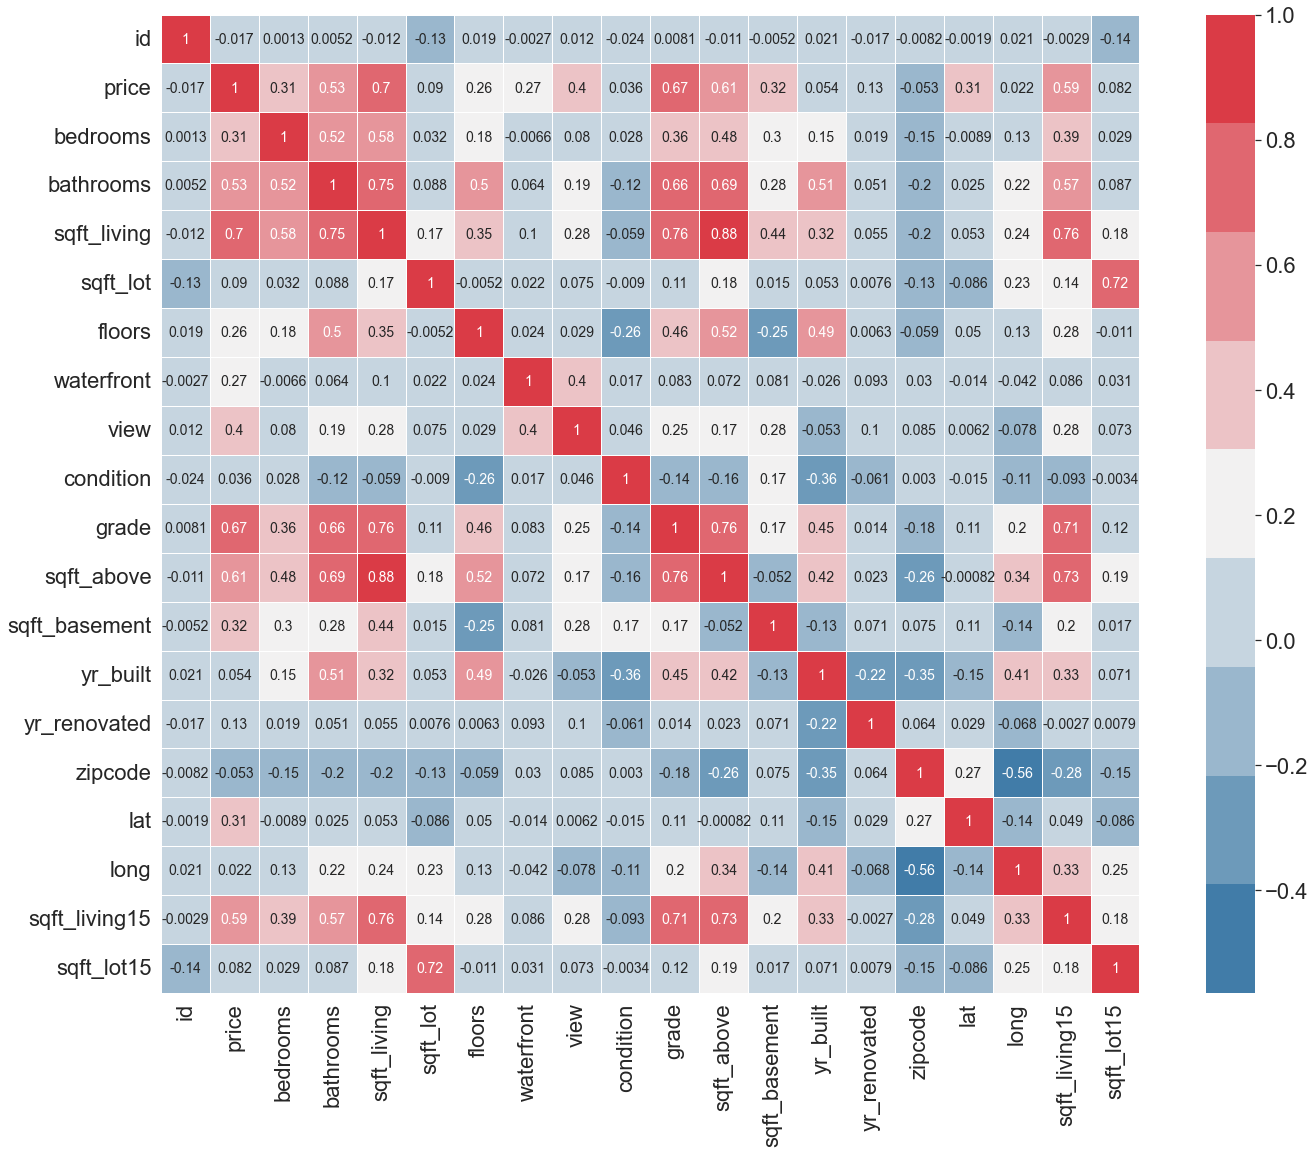

In [46]:
corr = hd.corr()
c = sns.diverging_palette(240, 10, n=9)
plt.figure(figsize = (24,18))
sns.heatmap(corr,cmap=c,square=True,annot = True,annot_kws = { 'fontsize' : 14 },linewidths=1, linecolor='white')
sns. set(font_scale=1.4)
plt.show()

regarding the relation between **price** features and another features we can find a very considerable effect of many features (bedrooms, bathrooms, Sqft_living,View, grade,Sqft_above,Sqft_basement,lat,Sqft_living15),especially Sqft_living feature , we can also find that the grade feature affects the price feature 

the prices of houses having sqft_living from 0 to 1000


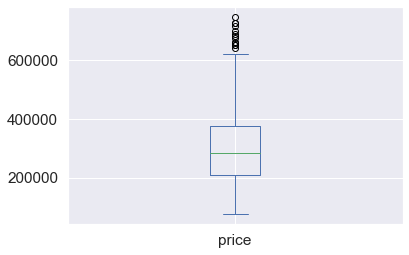

the prices of houses having sqft_living from 1000 to 2000


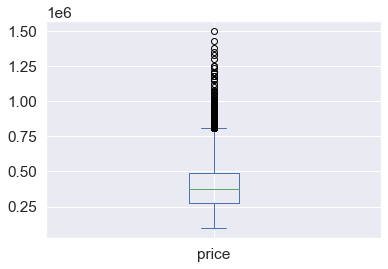

the prices of houses having sqft_living from 2000 to 3000


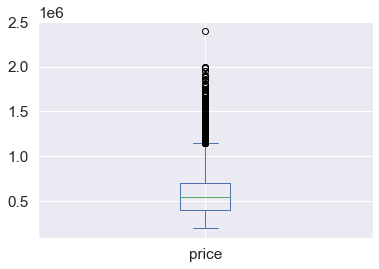

the prices of houses having sqft_living from 3000 to 4000


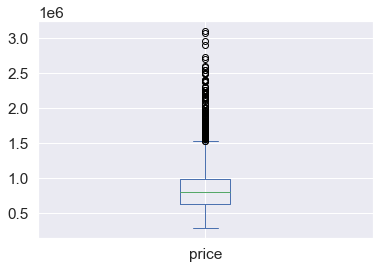

the prices of houses having sqft_living from 4000 to 5000


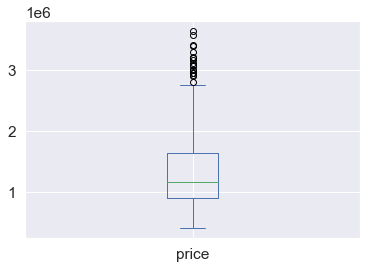

the prices of houses having sqft_living from 5000 to 6000


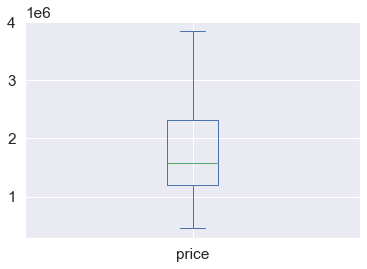

the prices of houses having sqft_living from 6000 to 7000


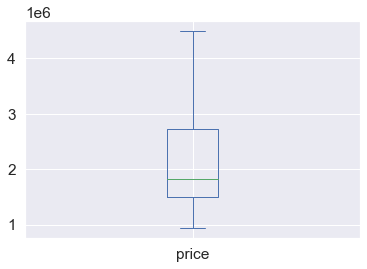

the prices of houses having sqft_living from 7000 to 8000


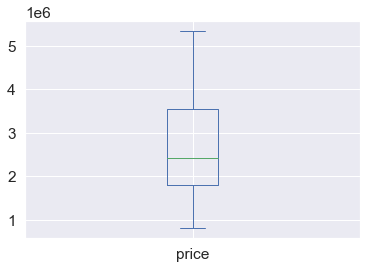

the prices of houses having sqft_living from 8000 to 9000


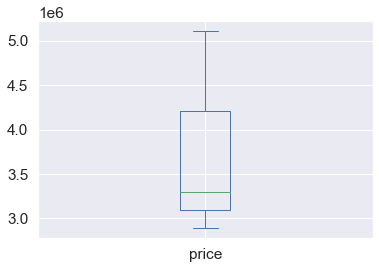

the prices of houses having sqft_living from 9000 to 10000


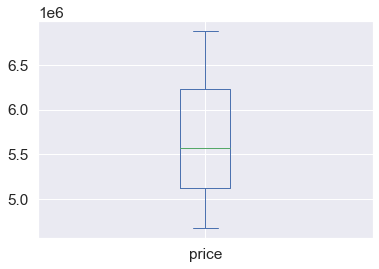

the prices of houses having sqft_living from 10000 to 11000


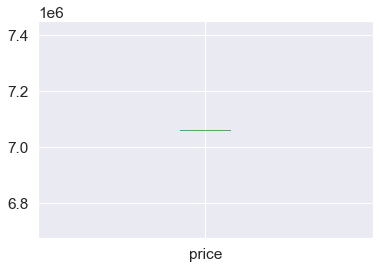

the prices of houses having sqft_living from 11000 to 12000


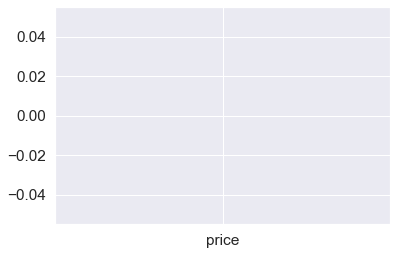

the prices of houses having sqft_living from 12000 to 13000


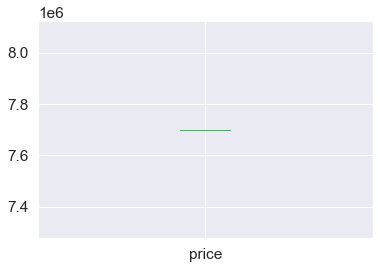

the prices of houses having sqft_living from 13000 to 14000


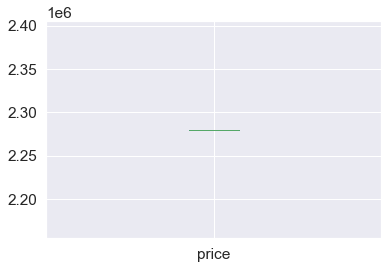

In [108]:
for i in range(1000,15000,1000):
    hd.loc[(hd["sqft_living"] <= i)&(hd["sqft_living"] > i-1000)]["price"].plot.box()
    print("the prices of houses having sqft_living from {} to {}".format(i-1000,i))
    plt.show()


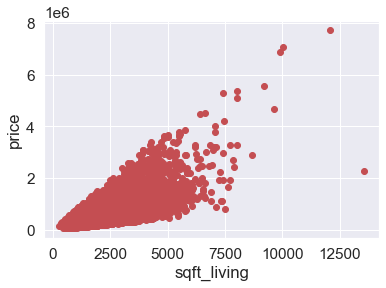

In [124]:
plt.plot(hd["sqft_living"],hd["price"],"ro")
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

we can see from the boxplots that we made the distribution of the prices according to the sqft living

MSE 71031362556.74606
R squared 0.5094896634542325


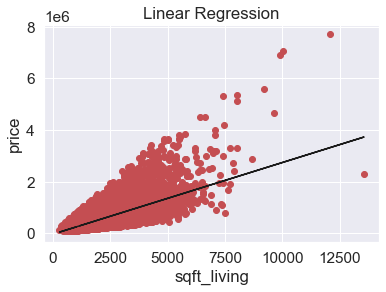

In [137]:
y = hd["price"].values[:,np.newaxis]
x = hd["sqft_living"].values[:,np.newaxis]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=20)

model=LinearRegression()  
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

as showed a linear regression is done by finding a mathematical relationship between the input and the output , but first the data must be splited to train and test data, the data that is used in training is used to deduce the relation and to see if the regression line is valid , we compare the output of the tested data and output from the mathematical relation.
One of the loss functions that we can use is MSE.MSE determines the average of the squared prediction error.
With the MSE we are asking ourselves how good a linear regression model is at predicting the output variable based on the input variables.Another way to measure the quality of a prediction is by calculating the R-squared which determines how much of the variance of the output around its mean is explained by the variance of the inputs

In [168]:
a=hd[["sqft_living","grade"]] 
b=hd["price"].values
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.35,random_state=40) 

mod=LinearRegression() 
mod.fit(a_train,b_train) 
predict=mod.predict(a_test)
print("MSE", mean_squared_error(b_test,predict))
print("R squared", metrics.r2_score(b_test,predict))

MSE 57413775762.86427
R squared 0.5433112989852685


we can see that adding another feature in the input it decreased the MSE and R-squared

In [166]:
c= hd[["sqft_living", "grade"]]
d= hd["price"].values

c_train, c_test, d_train, d_test = train_test_split(c, d, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

c_train_fit = poly.fit_transform(c_train) #transforming our input data
lg.fit(c_train_fit, d_train)
c_test_ = poly.fit_transform(c_test)
predicted = lg.predict(c_test_)

print("MSE: ", metrics.mean_squared_error(d_test, predicted))
print("R squared: ", metrics.r2_score(d_test,predicted))

MSE:  50395735021.3825
R squared:  0.5991351821441399


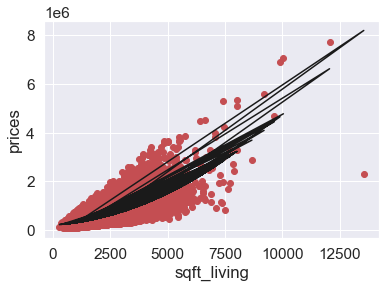

In [171]:
e = hd["sqft_living"].values.reshape(-1,1)
f = hd["price"].values
poly = PolynomialFeatures(degree = 3) 
e_poly = poly.fit_transform(e) 
poly.fit(e_poly, f) 
lg=LinearRegression()
lg.fit(e_poly, f) 

plt.scatter(e, f, color="r")
plt.ylabel("prices")
plt.xlabel("sqft_living")
plt.plot(e, lg.predict(poly.fit_transform(e)), color="k") 
plt.show()

polynomial regression models can bend. They can be constructed to the nth-degree to minimize squared error and maximize rsquared. Depending on the nth degree, the line of best fit can have more or less curves. The higher the exponent, the more numerous the curves.